In [50]:
import anndata
import scanpy as sc
import numpy as np
import pandas as pd
from scipy import sparse

In [20]:
samples = list( pd.read_csv("./sample_names.csv", header = None).values.flatten().astype('str') )

In [56]:
genes = np.loadtxt("./genes.txt", dtype=str)
for sample in samples:
    expr = sparse.load_npz("./expression-sample_%s.npz" % sample)
    pos = pd.read_csv("./positions-sample_%s.csv" % sample, header=None, sep=' ').values
    labels = pd.read_csv("./labels-sample_%s.csv" % sample, header=None).values.flatten()
    adata = anndata.AnnData(X=expr, var=pd.DataFrame(index=genes))
    adata.obsm['spatial'] = pos
    adata.obs['cluster'] = pd.Series(list(labels), dtype="category").values
    adata.write("./adata_%s.h5ad" % sample)

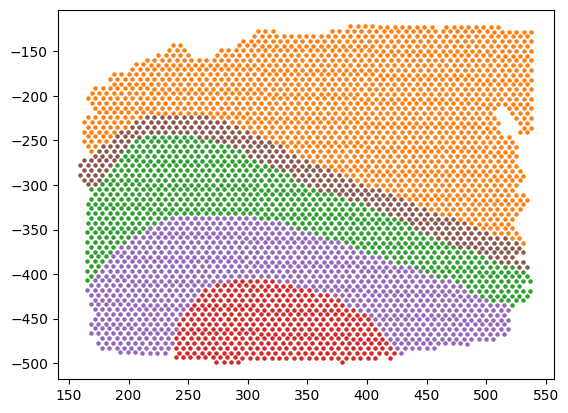

In [60]:
import matplotlib.pyplot as plt
labels = list(set(adata.obs['cluster']))
X = adata.obsm['spatial']
for label in labels:
    idx = np.where(adata.obs['cluster']==label)[0]
    plt.scatter(X[idx,0], X[idx,1], s=5)

In [38]:
pos

array([[ 459.72098793, -391.67418091],
       [ 202.4752545 , -439.55897103],
       [ 435.41855685, -197.56976378],
       ...,
       [ 236.54366251, -445.04952028],
       [ 227.45275311, -364.17643018],
       [ 302.29523993, -159.49595509]])